<a href="https://colab.research.google.com/github/aurora1112-j/aurora1112-j.github.io/blob/main/probability_statistic/continuous_distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Integral

In [ ]:
import numpy as np
from sympy import *  # 导入符号计算库
from matplotlib import pyplot as plt

In [ ]:
x = Symbol('x')  # 定义符号变量 x

In [ ]:
f_x = x**2 + 1/2  # 定义函数 f(x) = x^2 + 1/2
# f_x = x**2 - 1/2  # 可选函数 f(x) = x^2 - 1/2
f_x

x**2 + 0.5

In [ ]:
f_x_fcn = lambdify([x], f_x)  # 将符号函数 f(x) 转换为可数值计算的函数
integral_f_x = integrate(f_x, x)  # 计算 f(x) 的不定积分
integral_f_x

0.333333333333333*x**3 + 0.5*x

In [ ]:
integral_f_x_fcn = lambdify([x], integral_f_x)  # 将不定积分转换为数值函数

In [ ]:
a = 0  # 积分下限
b = 1  # 积分上限

num = 201  # 网格数量
x_array = np.linspace(-0.2, 1.2, num)  # x 的取值范围
x_a_b_array = np.linspace(a, b, num)  # 积分区间内的 x 取值范围
y_array = f_x_fcn(x_array)  # 计算函数在 x_array 上的值
y_a_b_array = f_x_fcn(x_a_b_array)  # 计算函数在积分区间 [a, b] 内的值

In [ ]:
integral_a_b = integral_f_x_fcn(b) - integral_f_x_fcn(a)  # 使用不定积分计算积分值
integral_a_b

0.833333333333333

In [ ]:
integral_a_b_v2 = integrate(f_x, (x, a, b))  # 使用定积分公式计算积分值
integral_a_b_v2


0.833333333333333

In [ ]:
integral_a_b_v2 = float(integral_a_b_v2)  # 将结果转换为浮点数
integral_a_b_v2

0.8333333333333333

Text(0.5, 1.0, '$\\int_a^b  f(x) = 0.8333$')

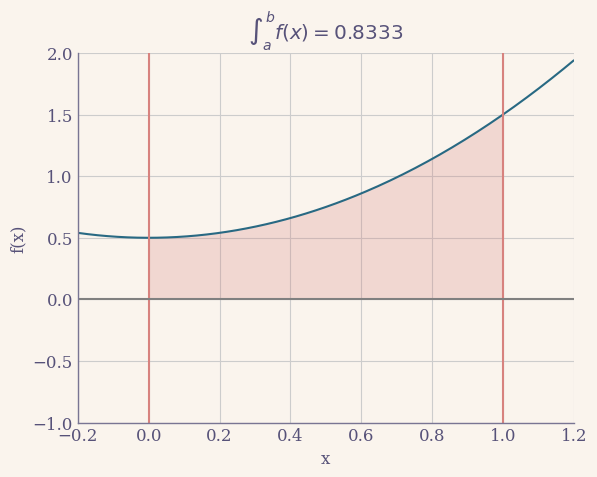

In [ ]:
import numpy as np
from sympy import *  # 导入符号计算库
from matplotlib import pyplot as plt
fig, ax = plt.subplots()

# plt.style.use('/content/rose-pine-dawn.mplstyle')

theme = {
    'base':    '#faf4ed',  # 米色背景
    'surface': '#fffaf3',  # 高亮背景
    'overlay': '#f2e9e1',  # 装饰层
    'text':    '#575279',  # 弱化紫灰文本
    'subtle':  '#797593',  # 次级文本
    'pine':    '#286983',  # 深蓝 (主线条)
    'foam':    '#56949f',  # 青绿 (填充/高亮)
    'rose':    '#d7827e',  # 玫瑰红 (强调)
    'iris':    '#907aa9',  # 紫色 (辅助)
    'highlight': '#cecacd' # 网格/轴线
}
ax.plot(x_array, y_array, color=theme['pine'])  # 绘制函数曲线
ax.axvline(x=a, linestyle='-', color=theme['rose'])  # 绘制积分下限 a
ax.axvline(x=b, linestyle='-', color=theme['rose'])  # 绘制积分上限 b
ax.axhline(y=0, linestyle='-', color='grey')  # 添加 y=0 参考线

ax.fill_between(x_a_b_array,
                y_a_b_array,
                edgecolor='none',
                facecolor=theme['rose'],
                alpha=0.25)  # 在积分区间 [a, b] 内填充颜色

ax.set_xlim(-0.2, 1.2)  # 设置 x 轴范围
ax.set_ylim(-1, 2)  # 设置 y 轴范围
plt.gca().spines['right'].set_visible(False)  # 隐藏右边框
plt.gca().spines['top'].set_visible(False)  # 隐藏上边框
ax.set_xlabel('x')  # 设置 x 轴标签
ax.set_ylabel('f(x)')  # 设置 y 轴标签
ax.set_title(r'$\int_a^b  f(x) = %0.4f$' % integral_a_b)  # 在标题中显示积分结果

# PDF & CDF

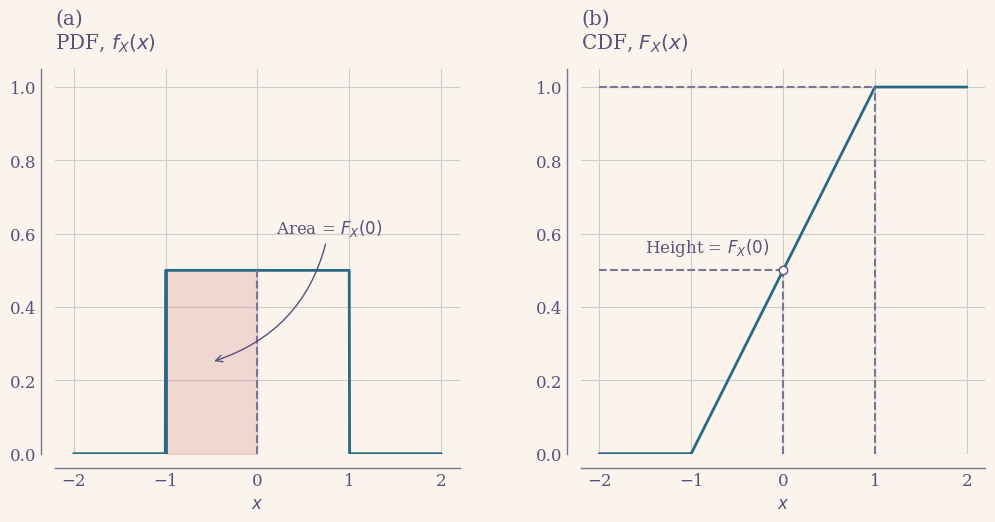

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# --- 1. 定义 Rose Pine Dawn 配色方案 ---
# 这是一个温暖、低对比度的亮色主题
theme = {
    'base':    '#faf4ed',  # 米色背景
    'surface': '#fffaf3',  # 高亮背景
    'overlay': '#f2e9e1',  # 装饰层
    'text':    '#575279',  # 弱化紫灰文本
    'subtle':  '#797593',  # 次级文本
    'pine':    '#286983',  # 深蓝 (主线条)
    'foam':    '#56949f',  # 青绿 (填充/高亮)
    'rose':    '#d7827e',  # 玫瑰红 (强调)
    'iris':    '#907aa9',  # 紫色 (辅助)
    'highlight': '#cecacd' # 网格/轴线
}

# 设置全局绘图参数 (rcParams) 以统一样式
plt.rcParams.update({
    'figure.facecolor': theme['base'],
    'axes.facecolor': theme['base'],
    'axes.edgecolor': theme['subtle'],
    'axes.labelcolor': theme['text'],
    'text.color': theme['text'],
    'xtick.color': theme['text'],
    'ytick.color': theme['text'],
    'font.family': 'serif', # 如有 LaTeX 环境可用 'serif' 并开启 text.usetex

    'font.size': 12
})

# --- 2. 准备数据 ---
# 定义 x 轴范围
x = np.linspace(-2, 2, 1000)

# 定义 PDF: 在 [-1, 1] 之间为 0.5，其余为 0
y_pdf = np.where((x >= -1) & (x <= 1), 0.5, 0)

# 定义 CDF: 简单的分段函数逻辑
y_cdf = np.clip((x + 1) / 2, 0, 1)

# --- 3. 绘图构建 ---
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
plt.subplots_adjust(wspace=0.3) # 调整子图间距

# === 左图: PDF ===
ax1 = axes[0]
# 绘制主线条
ax1.plot(x, y_pdf, color=theme['pine'], linewidth=2)

# 绘制阴影区域 (从 -1 到 0)
x_fill = np.linspace(-1, 0, 100)
y_fill = np.full_like(x_fill, 0.5)
ax1.fill_between(x_fill, y_fill, color=theme['rose'], alpha=0.25, label='Area')
# 补充阴影的边框，使其更像图示中的矩形块
ax1.vlines(x=0, ymin=0, ymax=0.5, colors=theme['subtle'], linestyles='--')
ax1.vlines(x=-1, ymin=0, ymax=0.5, colors=theme['pine'], linestyles='solid', linewidth=2) # 补全左侧

# 标注: Area = F_x(0)
# 使用 annotate 画出原本的"大括号"效果或曲线箭头
ax1.annotate('Area = $F_X(0)$',
             xy=(-0.5, 0.25), xycoords='data',
             xytext=(0.2, 0.6), textcoords='data',
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=-0.3", color=theme['text']),
             fontsize=12)

# 设置标签和标题
ax1.set_title('(a)\nPDF, $f_X(x)$', loc='left', pad=15)
ax1.set_xlabel('$x$')
ax1.set_ylim(0, 1.05)
ax1.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])

# === 右图: CDF ===
ax2 = axes[1]
# 绘制主线条
ax2.plot(x, y_cdf, color=theme['pine'], linewidth=2) # 使用主题蓝

# 标记关键点 (0, 0.5)
ax2.plot(0, 0.5, 'o', markerfacecolor='white', markeredgecolor=theme['text'], zorder=5)

# 绘制虚线辅助线
ax2.hlines(y=0.5, xmin=-2, xmax=0, colors=theme['subtle'], linestyles='--')
ax2.vlines(x=0, ymin=0, ymax=0.5, colors=theme['subtle'], linestyles='--')
ax2.vlines(x=1, ymin=0, ymax=1, colors=theme['subtle'], linestyles='--') # x=1 处的虚线
ax2.hlines(y=1, xmin=-2, xmax=1, colors=theme['subtle'], linestyles='--') # y=1 处的虚线

# 标注: Height = F_x(0)
ax2.annotate('Height = $F_X(0)$',
             xy=(0, 0.5), xycoords='data',
             xytext=(-1.5, 0.55), textcoords='data',
             arrowprops=None, # 原图文字直接在虚线上方，不需要箭头
             fontsize=12)

# 设置标签和标题
ax2.set_title('(b)\nCDF, $F_X(x)$', loc='left', pad=15)
ax2.set_xlabel('$x$')
ax2.set_ylim(0, 1.05)
ax2.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])

# === 通用美化 ===
for ax in axes:
    # 设置 x 轴刻度
    ax.set_xticks([-2, -1, 0, 1, 2])
    # 移除上方和右侧的边框 (Spines)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    # 调整左侧和底部边框颜色
    ax.spines['left'].set_color(theme['subtle'])
    ax.spines['bottom'].set_color(theme['subtle'])
    # 让坐标轴稍微分离一点 (类似于 Seaborn 的 trim)
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))

plt.show()

图（a）中PDF的面积对应概率值；图（b）中CDF的高度对应概率值


CDF为PDF积分所得

# Exponential Distribution

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import expon
from matplotlib import cm # Colormaps
x = np.linspace(start = 0, stop = 10, num = 500) # 定义 x 轴范围

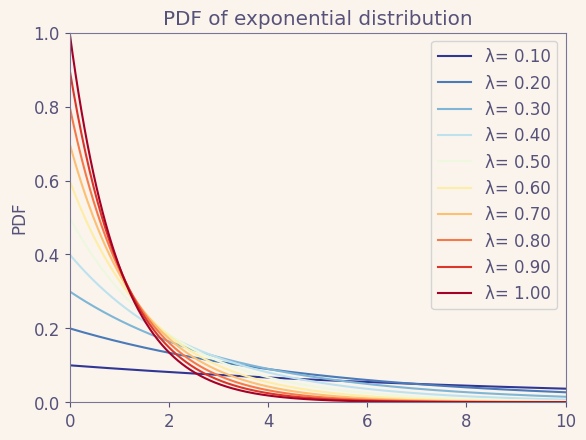

In [ ]:
fig, ax = plt.subplots() # 创建图表

lambdas = np.arange(0.1,1.1,0.1) # 定义不同的 lambda 值

colors = plt.cm.RdYlBu_r(np.linspace(0,1,len(lambdas))) # 设置颜色映射

for i in range(0,len(lambdas)): # 遍历 lambda 值并绘制对应的 PDF
    lambda_i = lambdas[i] # 选择当前的 lambda 值
    plt.plot(x, expon.pdf(x, loc = 0, scale = 1/lambda_i),  # 绘制 PDF 曲线
             color = colors[int(i)],
             label = "\u03BB= %.2f" %lambda_i) # 添加标签

plt.ylim((0, 1)) # 设置 y 轴范围
plt.xlim((0,10)) # 设置 x 轴范围
plt.title("PDF of exponential distribution") # 添加标题
plt.ylabel("PDF") # 设置 y 轴标签
plt.legend() # 显示图例
plt.show() # 显示图表

$\lambda$ 越大，事件发生得越频繁，你等待的时间 ($X$) 就越短。

高  λ  (红色线,  λ=1.00 )：含义：事件发生非常频繁（比如繁忙时段的客服电话）。形态：曲线起点很高，下降非常快（陡峭）。这意味着“短等待时间”的概率极高，很难出现“长等待时间”。

低 $\lambda$ (深蓝线, $\lambda=0.10$)：含义：事件发生很稀疏（比如乡间小路上的过路车）。形态：曲线起点很低，下降非常缓慢（平坦）。这意味着“短等待时间”和“长等待时间”的概率分布比较均匀，你有更大的可能性需要等很久。

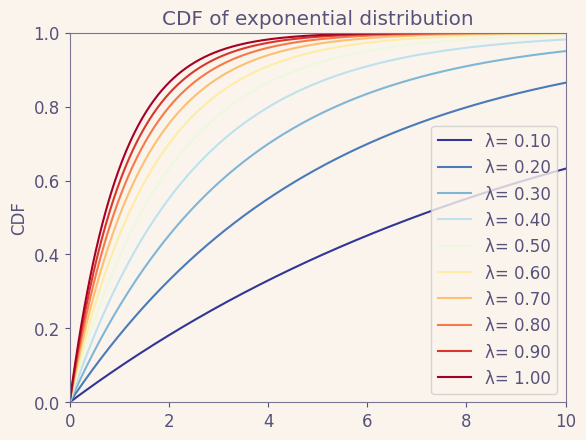

In [ ]:
fig, ax = plt.subplots() # 创建图表

for i in range(0,len(lambdas)): # 遍历 lambda 值并绘制对应的 CDF
    lambda_i = lambdas[i] # 选择当前的 lambda 值
    plt.plot(x, expon.cdf(x, loc = 0, scale = 1/lambda_i),  # 绘制 CDF 曲线
             color = colors[int(i)],
             label = "\u03BB= %.2f" %lambda_i) # 添加标签

plt.ylim((0, 1)) # 设置 y 轴范围
plt.xlim((0,10)) # 设置 x 轴范围
plt.title("CDF of exponential distribution") # 添加标题
plt.ylabel("CDF") # 设置 y 轴标签
plt.legend() # 显示图例
plt.show() # 显示图表

## Exponential & Poisson

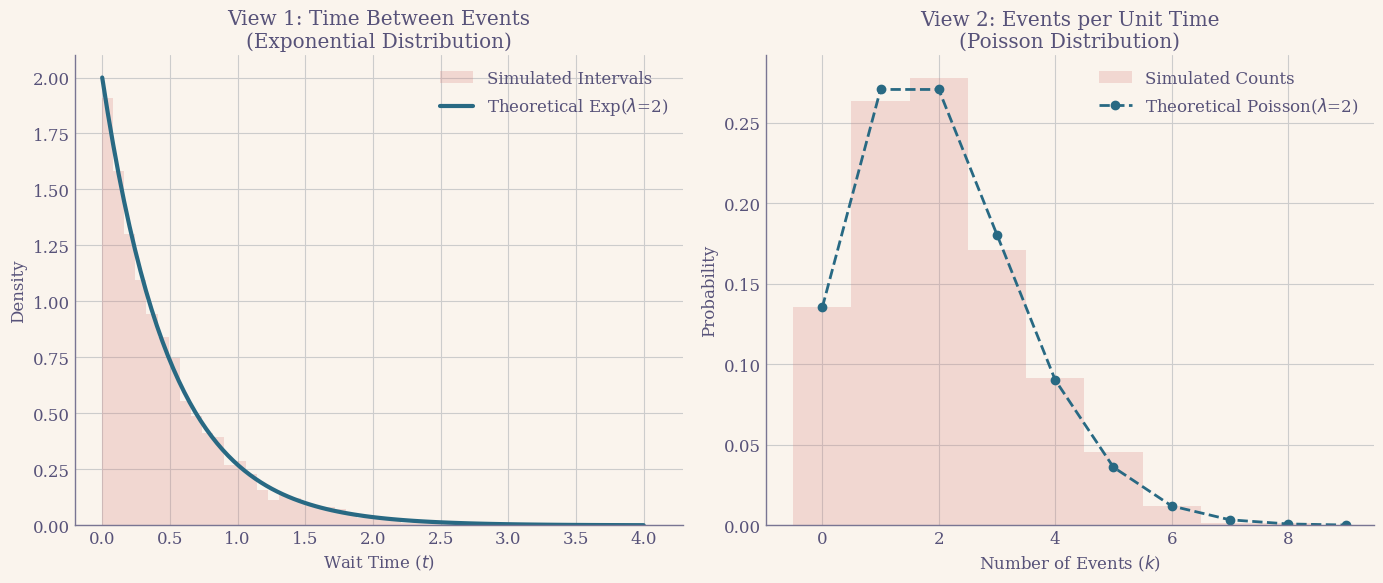

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson, expon

# --- 1. 设置 Rose Pine Dawn 风格 (简化版) ---
theme = {
    'base':    '#faf4ed',  # 米色背景
    'surface': '#fffaf3',  # 高亮背景
    'overlay': '#f2e9e1',  # 装饰层
    'text':    '#575279',  # 弱化紫灰文本
    'subtle':  '#797593',  # 次级文本
    'pine':    '#286983',  # 深蓝 (主线条)
    'foam':    '#56949f',  # 青绿 (填充/高亮)
    'rose':    '#d7827e',  # 玫瑰红 (强调)
    'iris':    '#907aa9',  # 紫色 (辅助)
    'highlight': '#cecacd' # 网格/轴线
}

# theme = {
    #'base': '#faf4ed', 'text': '#575279', 'pine': '#286983',
    #'rose': '#d7827e', 'foam': '#56949f', 'highlight': '#cecacd'
# }
plt.rcParams.update({
    'figure.facecolor': theme['base'], 'axes.facecolor': theme['base'],
    'text.color': theme['text'], 'axes.labelcolor': theme['text'],
    'xtick.color': theme['text'], 'ytick.color': theme['text'],
    'axes.spines.top': False, 'axes.spines.right': False
})

# --- 2. 模拟数据 ---
np.random.seed(42)
rate_lambda = 2  # 平均每单位时间发生 2 次 (λ=2)
total_events = 5000

# 生成事件间隔 (Intervals)：根据定义，这应该符合指数分布
intervals = np.random.exponential(scale=1/rate_lambda, size=total_events)

# 计算事件发生的绝对时间点 (Arrival Times)
arrival_times = np.cumsum(intervals)

# 统计单位时间内的事件数量 (Counts)：这应该符合泊松分布
# 我们将总时间切分成许多 1.0 单位长度的片段
max_time = int(arrival_times[-1])
counts_per_unit_time = []
for i in range(max_time):
    # 统计在时间段 [i, i+1) 内发生的事件数
    count = np.sum((arrival_times >= i) & (arrival_times < i+1))
    counts_per_unit_time.append(count)

# --- 3. 绘图验证 ---
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# === 左图：验证指数分布 (间隔) ===
ax1 = axes[0]
ax1.hist(intervals, bins=50, density=True, color=theme['rose'], alpha=0.25, label='Simulated Intervals')
# 理论曲线
x_exp = np.linspace(0, 4, 100)
y_exp = expon.pdf(x_exp, scale=1/rate_lambda)
ax1.plot(x_exp, y_exp, color=theme['pine'], lw=3, label=rf'Theoretical Exp($\lambda$={rate_lambda})')
ax1.set_title('View 1: Time Between Events\n(Exponential Distribution)')
ax1.set_xlabel('Wait Time ($t$)')
ax1.set_ylabel('Density')
ax1.legend()

# === 右图：验证泊松分布 (计数) ===
ax2 = axes[1]
# 统计模拟数据的频率
bins = np.arange(0, 10) - 0.5
ax2.hist(counts_per_unit_time, bins=bins, density=True, color=theme['rose'], alpha=0.25, label='Simulated Counts')
# 理论概率点
k_poisson = np.arange(0, 10)
y_poisson = poisson.pmf(k_poisson, mu=rate_lambda)
ax2.plot(k_poisson, y_poisson, 'o--', color=theme['pine'], lw=2, label=rf'Theoretical Poisson($\lambda$={rate_lambda})')
ax2.set_title('View 2: Events per Unit Time\n(Poisson Distribution)')
ax2.set_xlabel('Number of Events ($k$)')
ax2.set_ylabel('Probability')
ax2.legend()

plt.tight_layout()
plt.show()

# Gaussian Distribution

## Gaussian Integral

高斯积分下面积为 π ：

$\int_{-\infty}^{\infty} e^{-x^2} dx$



*  正态分布的归一化


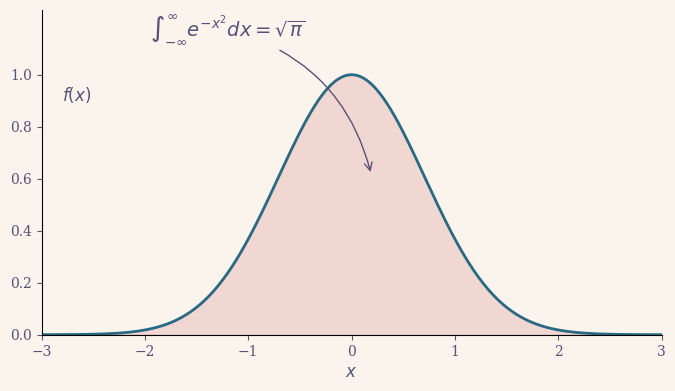

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 1. 准备数据
# x 轴数据点，从 -3 到 3
x = np.linspace(-3, 3, 1000)
# 高斯函数 f(x) = exp(-x^2)
y = np.exp(-x**2)


# --- 设置 Rose Pine Dawn 风格 (简化版) ---
theme = {
    'base':    '#faf4ed',  # 米色背景
    'surface': '#fffaf3',  # 高亮背景
    'overlay': '#f2e9e1',  # 装饰层
    'text':    '#575279',  # 弱化紫灰文本
    'subtle':  '#797593',  # 次级文本
    'pine':    '#286983',  # 深蓝 (主线条)
    'foam':    '#56949f',  # 青绿 (填充/高亮)
    'rose':    '#d7827e',  # 玫瑰红 (强调)
    'iris':    '#907aa9',  # 紫色 (辅助)
    'highlight': '#cecacd' # 网格/轴线
}

plt.rcParams.update({
    'figure.facecolor': theme['base'], 'axes.facecolor': theme['base'],
    'text.color': theme['text'], 'axes.labelcolor': theme['text'],
    'xtick.color': theme['text'], 'ytick.color': theme['text'],'font.family': 'serif',
    'axes.spines.top': False, 'axes.spines.right': False
})


# 2. 设置颜色
# curve_color = '#1f77b4'  # 曲线颜色 (蓝色)
# fill_color = '#a6cee3'   # 填充颜色 (浅蓝色)
# box_edge_color = curve_color # 公式框边框颜色
# box_fill_color = '#e6f2ff'   # 公式框背景颜色

# 3. 创建图表
fig, ax = plt.subplots(figsize=(8, 5))

# 绘制高斯函数曲线
ax.plot(x, y, color=theme['pine'], linewidth=2)

# 填充曲线下方的面积
ax.fill_between(x, y, color=theme['rose'], alpha=0.25)

# 4. 设置坐标轴
ax.set_xlim(-3, 3)
ax.set_ylim(0, 1.25) #稍微增加y轴上限，为标注留出空间
ax.set_xticks([-3, -2, -1, 0, 1, 2, 3])
ax.set_yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])

# 添加坐标轴标签
ax.set_xlabel('$x$', fontsize=12)
# 在图内添加 y 轴标签 f(x)
ax.text(-2.8, 0.9, '$f(x)$', fontsize=12)

# 隐藏顶部和右侧的脊柱 (边框)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# 5. 添加顶部公式框
# 使用 fig.text 在图形上方添加带有边框的文本
# fig.text(
    #0.5, 0.90, # 位置 (x, y)
    #r'$\int_{-\infty}^{\infty} \exp(-x^2)dx = \sqrt{\pi}$', # LaTeX 公式
    #ha='center', va='center', fontsize=16,
    # bbox=dict(facecolor=box_fill_color, edgecolor=box_edge_color, boxstyle='square,pad=0.6') # 边框样式
# )

# 6. 添加指向积分面积的带箭头的标注
ax.annotate(
    r'$\int_{-\infty}^{\infty} e^{-x^2} dx = \sqrt{\pi}$', # 标注文本
    xy=(0.2, 0.6),       # 箭头指向的点 (在阴影区域内)
    xycoords='data',
    xytext=(-1.2, 1.15), # 文本放置的点
    textcoords='data',
    arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=-0.3", color=theme['text'], shrinkB=5), # 箭头样式
    fontsize=14, ha='center'
)

# 7. 添加图题
# fig.text(0.5, 0.05, '图 8. 高斯函数正负无穷积分面积', ha='center', fontsize=12)

# 调整布局以防止内容被遮挡
plt.subplots_adjust(top=0.8, bottom=0.15)

# 显示图表
plt.show()

## Error Function

* 有些函数无法用初等函数（如 $x^n, \sin x, \log x$ 等）来写出它的原函数，也就是无法直接求出积分——于是我们直接给这个积分起个名字，叫 "Error Function" ，并把它作为一个标准函数存入计算机和数学库中。





*  误差函数是利用高斯积分定义的，它没有一般意义上的解析式



* 高斯分布的 CDF 本质上就是调整过比例和位置的误差函数。



---



1. **误差函数 (erf)定义为标准高斯曲线
（经过缩放）从 0 到 x 的积分**

* 这里经过了归一化：

  因为 $e^{-t^2}$ 是偶函数（左右对称），所以从 $0$ 到 $+\infty$ 的积分是总面积的一半：$$\int_{0}^{\infty} e^{-t^2} dt = \frac{\sqrt{\pi}}{2}$$

$$\text{erf}(x) = \underbrace{\frac{2}{\sqrt{\pi}}}_{\text{归一化系数}} \cdot \underbrace{\int_{0}^{x} e^{-t^2} dt}_{\text{累积面积}}$$


* 奇函数：$\text{erf}(-x) = -\text{erf}(x)$。$x$一般取正值
* $\text{erf}(0) = 0$，$\text{erf}(\infty) = 1$。



---



2. **高斯分布 CDF（累积分布函数）定义为 PDF (概率密度函数)从 $-\infty$ 到 x 的积分：**$$F_X(x) = \int_{-\infty}^{x} \frac{1}{\sqrt{2\pi}\sigma} e^{-\frac{(t-\mu)^2}{2\sigma^2}} dt$$

* 将积分从中心 $\mu$ 切开，分为两部分：$(-\infty, \mu]$ 和 $[\mu, x]$：
$$F(x) = \underbrace{\frac{1}{\sqrt{2\pi}\sigma} \int_{-\infty}^{\mu} \exp(\dots) dt}_{\text{左半边面积 } = 0.5} + \underbrace{\frac{1}{\sqrt{2\pi}\sigma} \int_{\mu}^{x} \exp(\dots) dt}_{\text{中心到 } x \text{ 的面积}}$$

* 换元法：把右侧积分变成 erf 的形式： $$\int e^{-u^2} du$$

  令$$u = \frac{t-\mu}{\sigma\sqrt{2}}$$

  微分项变化：$$dt = \sigma\sqrt{2} \, du$$

* 积分上下限变换：

  当 $t = \mu$ 时，$u = 0$
  
  当 $t = x$ 时，$u = \frac{x-\mu}{\sigma\sqrt{2}}$

* 代入积分：$$\begin{aligned}
\text{右侧积分} &= \frac{1}{\sqrt{2\pi}\sigma} \int_{0}^{\frac{x-\mu}{\sigma\sqrt{2}}} e^{-u^2} \cdot (\sigma\sqrt{2} \, du) \\
&= \frac{\sigma\sqrt{2}}{\sqrt{2\pi}\sigma} \int_{0}^{\frac{x-\mu}{\sigma\sqrt{2}}} e^{-u^2} \, du \\
&= \frac{1}{\sqrt{\pi}} \int_{0}^{\frac{x-\mu}{\sigma\sqrt{2}}} e^{-u^2} \, du
\end{aligned}$$

* 由erf定义得：$$\text{右侧积分} = \frac{1}{2} \text{erf}\left( \frac{x-\mu}{\sigma\sqrt{2}} \right)$$

* 合并：$$F(x) = \frac{1}{2} \left[ 1 + \text{erf}\left( \frac{x-\mu}{\sigma\sqrt{2}} \right) \right]$$



---



## Gaussian PDF & CDF

**归一化：因为所有PDF曲线下的面积必须为1**


* 未归一化的原始函数：
$$g(x) = e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$



---



* 直接积分：$$Area = \int_{-\infty}^{\infty} e^{-\frac{(x-\mu)^2}{2\sigma^2}} dx$$

* 换元法：$$t = \frac{x - \mu}{\sqrt{2}\sigma}$$

  变回标准形式： $\int e^{-t^2} dt$

* 微分项的变化：$$x = \sqrt{2}\sigma t + \mu$$

$$dx = \sqrt{2}\sigma \, dt$$



---





* 代回计算：$$\begin{aligned}
Area &= \int_{-\infty}^{\infty} e^{-t^2} \cdot (\underbrace{\sqrt{2}\sigma \, dt}_{这是原来的 dx}) \\
&= \sqrt{2}\sigma \cdot \underbrace{\int_{-\infty}^{\infty} e^{-t^2} dt}_{这是标准高斯积分 \sqrt{\pi}}
\end{aligned}$$

$$Area = \sqrt{2}\sigma \cdot \sqrt{\pi} = \sigma \sqrt{2\pi}$$

<b>这意味着，如果不加任何控制，曲线越宽（$\sigma$ 越大），下面的面积就越大!



---



归一化后的Gaussian PDF：$$f(x) = \underbrace{\frac{1}{\sqrt{2\pi}\sigma}}_{\text{压扁系数}} \cdot \underbrace{e^{-\frac{(x-\mu)^2}{2\sigma^2}}}_{\text{形状函数}}$$

$$\text{CDF}(x) = \int_{-\infty}^{x} \left( \frac{1}{\sqrt{2\pi}\sigma} e^{-\frac{(t-\mu)^2}{2\sigma^2}} \right) dt$$

当 $x \to \infty$ 时：

高斯积分：$\int_{-\infty}^{\infty} e^{-x^2} dx = \sqrt{\pi}$ （原始数值）

CDF：$F(\infty) = 1$ （因为前面的系数 $\frac{1}{\sqrt{2\pi}\sigma}$ 把 $\sqrt{\pi}$ 给抵消掉了）

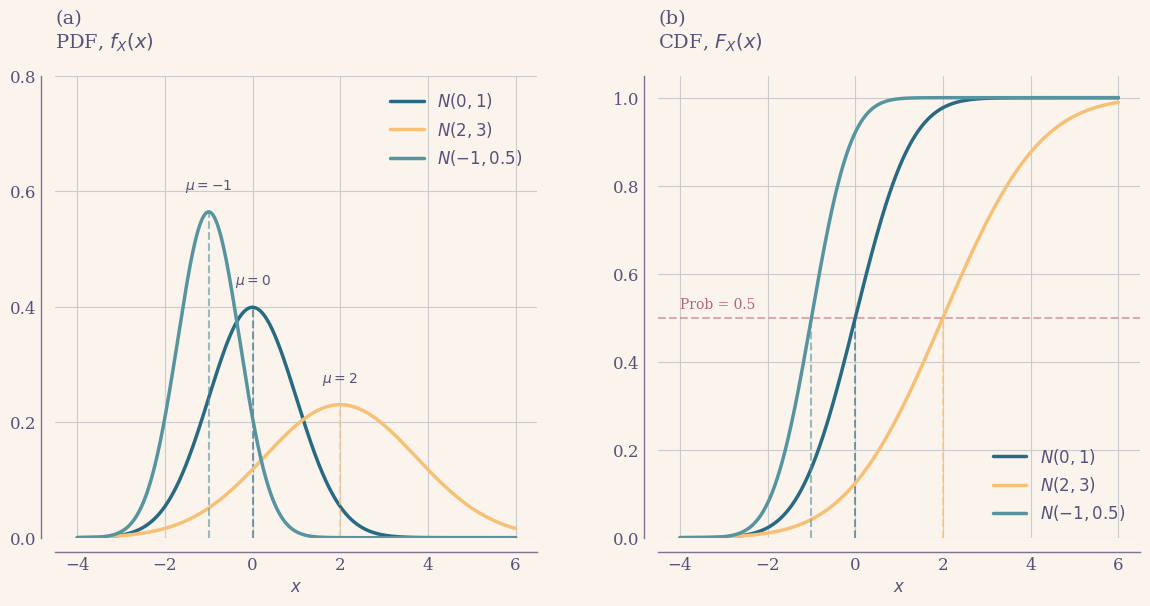

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# --- 1. 定义 Rose Pine Dawn 配色方案 ---
theme = {
    'base':    '#faf4ed',  # 米色背景
    'surface': '#fffaf3',
    'text':    '#575279',  # 深紫灰文本
    'subtle':  '#797593',  # 浅灰辅助色
    'pine':    '#286983',  # 深蓝 (对应原图蓝色)
    'gold':    '#f6c177',  # 暖金 (对应原图橙色)
    'foam':    '#56949f',  # 青绿 (对应原图绿色)
    'love':    '#b4637a'   # 红色 (用于辅助线)
}

# 全局绘图参数设置
plt.rcParams.update({
    'figure.facecolor': theme['base'],
    'axes.facecolor': theme['base'],
    'axes.edgecolor': theme['subtle'],
    'axes.labelcolor': theme['text'],
    'text.color': theme['text'],
    'xtick.color': theme['text'],
    'ytick.color': theme['text'],
    'font.family': 'serif',
    'font.size': 12,
    'axes.spines.top': False,
    'axes.spines.right': False
})

# --- 2. 准备数据 ---
# 定义分布参数: (均值 mu, 标准差 sigma, 标签, 颜色代码)
# 注意：原图标注 N(2,3) 中的 3 通常指方差(sigma^2)，但在 scipy 中我们需要 sigma。
# 如果原图 3 是方差，sigma = sqrt(3)。如果原图 3 是标准差，sigma = 3。
# 观察曲线形态，橙色曲线非常扁平，说明方差很大，这里假设 3 是方差 (sigma^2=3)。
# 绿色曲线非常尖锐，0.5 是方差 (sigma^2=0.5)。
dist_params = [
    (0, 1, r'$N(0, 1)$', theme['pine']),
    (2, np.sqrt(3), r'$N(2, 3)$', theme['gold']),
    (-1, np.sqrt(0.5), r'$N(-1, 0.5)$', theme['foam'])
]

x = np.linspace(-4, 6, 1000)

# --- 3. 绘图构建 ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
plt.subplots_adjust(wspace=0.25)

# === 子图 (a): PDF ===
for mu, sigma, label, color in dist_params:
    y = norm.pdf(x, mu, sigma)
    ax1.plot(x, y, color=color, linewidth=2.5, label=label)

    # 绘制均值处的垂直虚线 (高度到峰值)
    peak_height = norm.pdf(mu, mu, sigma)
    ax1.vlines(x=mu, ymin=0, ymax=peak_height, color=color,
               linestyles='--', alpha=0.6, linewidth=1.5)

    # 在顶部标注 mu 的值
    ax1.text(mu, peak_height + 0.03, fr'$\mu={mu}$',
             ha='center', va='bottom', color=theme['text'], fontsize=10)

ax1.set_title('(a)\nPDF, $f_X(x)$', loc='left', pad=20, fontsize=14)
ax1.set_xlabel('$x$')
ax1.set_ylim(0, 0.8) # 留出顶部空间给文字
ax1.set_yticks([0, 0.2, 0.4, 0.6, 0.8])
ax1.legend(frameon=False, loc='upper right')

# === 子图 (b): CDF ===
for mu, sigma, label, color in dist_params:
    y = norm.cdf(x, mu, sigma)
    ax2.plot(x, y, color=color, linewidth=2.5, label=label)

    # 绘制均值处的垂直虚线 (CDF=0.5)
    ax2.vlines(x=mu, ymin=0, ymax=0.5, color=color,
               linestyles='--', alpha=0.6, linewidth=1.5)

# 绘制 y=0.5 的水平辅助线
ax2.axhline(y=0.5, color=theme['love'], linestyle='--', alpha=0.5, linewidth=1.5)
ax2.text(x=-4, y=0.52, s='Prob = 0.5', color=theme['love'], fontsize=10)

ax2.set_title('(b)\nCDF, $F_X(x)$', loc='left', pad=20, fontsize=14)
ax2.set_xlabel('$x$')
ax2.set_ylim(0, 1.05)
ax2.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax2.legend(frameon=False, loc='lower right')

# === 细节美化 ===
for ax in [ax1, ax2]:
    # 调整轴脊颜色
    ax.spines['left'].set_color(theme['subtle'])
    ax.spines['bottom'].set_color(theme['subtle'])
    # 轴脊分离效果
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))
    # 刻度设置
    ax.tick_params(axis='x', colors=theme['text'])
    ax.tick_params(axis='y', colors=theme['text'])

plt.show()

图（a），离μ越近，概率密度越高

### CDF, PDF, First & Second Derivative

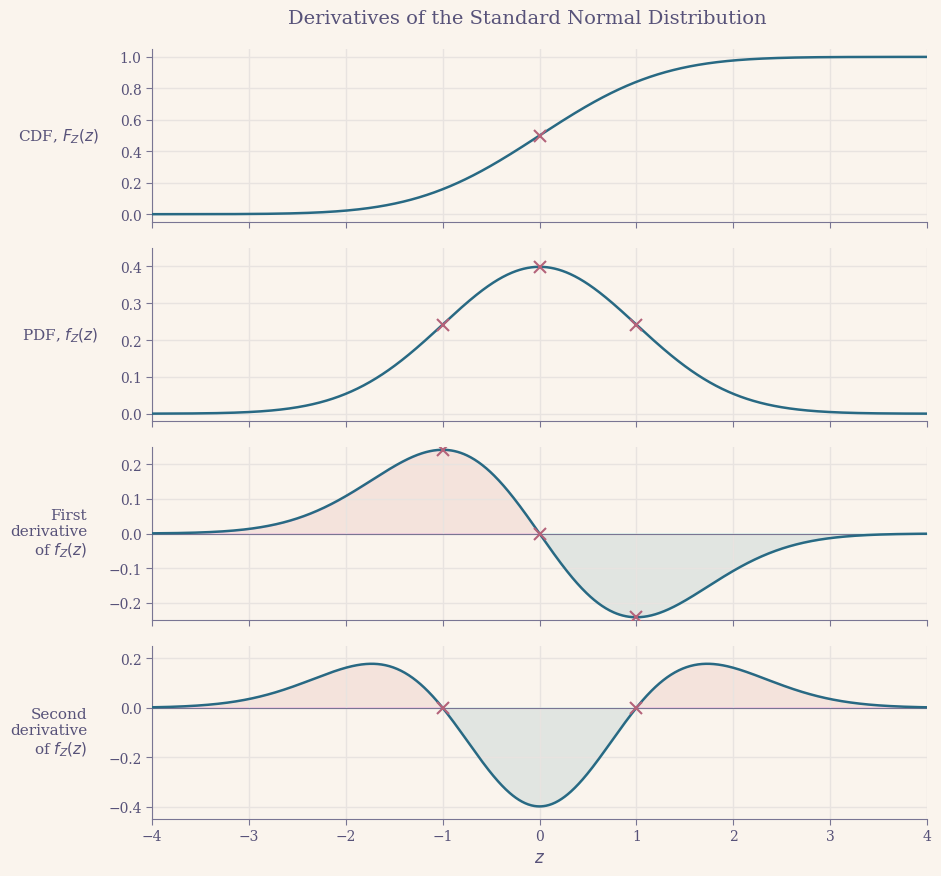

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# --- 1. Rose Pine Dawn 配色方案 ---
theme = {
    'base':    '#faf4ed',  # 背景
    'text':    '#575279',  # 主要文本
    'subtle':  '#797593',  # 辅助文本/边框
    'pine':    '#286983',  # 主曲线 (深蓝)
    'rose':    '#d7827e',  # 正值填充/高亮 (粉红)
    'foam':    '#56949f',  # 负值填充 (青色)
    'iris':    '#907aa9',  # 辅助紫色
    'love':    '#b4637a',  # 关键点标记 (红)
    'grid':    '#e8e3e0'   # 网格线
}

# 全局绘图设置
plt.rcParams.update({
    'figure.facecolor': theme['base'],
    'axes.facecolor': theme['base'],
    'text.color': theme['text'],
    'axes.labelcolor': theme['text'],
    'xtick.color': theme['text'],
    'ytick.color': theme['text'],
    'font.family': 'serif',
    'axes.spines.top': False,
    'axes.spines.right': False
})

# --- 2. 数据准备 ---
z = np.linspace(-4, 4, 1000)

# (1) CDF
y_cdf = norm.cdf(z)

# (2) PDF: f(z)
y_pdf = norm.pdf(z)

# (3) 一阶导数: f'(z) = -z * f(z)
y_d1 = -z * y_pdf

# (4) 二阶导数: f''(z) = (z^2 - 1) * f(z)
y_d2 = (z**2 - 1) * y_pdf

# --- 3. 绘图构建 ---
fig, axes = plt.subplots(4, 1, figsize=(10, 10), sharex=True)
plt.subplots_adjust(hspace=0.15) # 调整子图间距

# 定义通用绘图函数以减少重复代码
def plot_curve(ax, x, y, label_text, mark_points=[], fill=False):
    # 绘制主曲线
    ax.plot(x, y, color=theme['pine'], linewidth=1.8, zorder=10)

    # 设置 Y 轴标签 (多行，旋转0度，水平右对齐)
    ax.set_ylabel(label_text, rotation=0, ha='right', va='center', labelpad=15, fontsize=11)

    # 绘制网格
    ax.grid(True, color=theme['grid'], linestyle='-', linewidth=1, zorder=0)

    # 处理填充 (用于导数图)
    if fill:
        # 正值部分填充 Rose
        ax.fill_between(x, y, 0, where=(y >= 0), color='#ff00ff', alpha=0.15, interpolate=True, facecolor=theme['rose'])
        # 负值部分填充 Foam
        ax.fill_between(x, y, 0, where=(y <= 0), color='#00ffff', alpha=0.15, interpolate=True, facecolor=theme['foam'])
        # 添加 y=0 参考线
        ax.axhline(0, color=theme['subtle'], linewidth=0.8, zorder=5)

    # 标记关键点 (红叉)
    for px in mark_points:
        # 计算对应的 y 值
        if label_text.startswith("CDF"): py = norm.cdf(px)
        elif label_text.startswith("PDF"): py = norm.pdf(px)
        elif "First" in label_text: py = -px * norm.pdf(px)
        elif "Second" in label_text: py = (px**2 - 1) * norm.pdf(px)

        # 绘制标记
        ax.plot(px, py, marker='x', color=theme['love'], markersize=8, markeredgewidth=1.5, zorder=20)
        # 可选：添加垂直虚线辅助
        ax.axvline(px, color=theme['subtle'], linestyle='-', linewidth=0.5, alpha=0.5, zorder=0)

# === 子图 1: CDF ===
plot_curve(axes[0], z, y_cdf, "CDF, $F_Z(z)$", mark_points=[0])
axes[0].set_ylim(-0.05, 1.05)
axes[0].set_yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])

# === 子图 2: PDF ===
plot_curve(axes[1], z, y_pdf, "PDF, $f_Z(z)$", mark_points=[-1, 0, 1])
axes[1].set_ylim(-0.02, 0.45)
axes[1].set_yticks([0.0, 0.1, 0.2, 0.3, 0.4])

# === 子图 3: 一阶导数 ===
# 拐点在 z = +/- 1 (导数的极值点)
plot_curve(axes[2], z, y_d1, "First\nderivative\nof $f_Z(z)$", mark_points=[-1, 0, 1], fill=True)
axes[2].set_ylim(-0.25, 0.25)

# === 子图 4: 二阶导数 ===
# 零点在 z = +/- 1
plot_curve(axes[3], z, y_d2, "Second\nderivative\nof $f_Z(z)$", mark_points=[-1, 1], fill=True)
axes[3].set_ylim(-0.45, 0.25)
axes[3].set_xlabel('$z$', fontsize=12)

# === 美化坐标轴 ===
for ax in axes:
    ax.spines['left'].set_color(theme['subtle'])
    ax.spines['bottom'].set_color(theme['subtle'])
    # 隐藏刻度线但保留文字
    ax.tick_params(axis='both', which='both', length=4, color=theme['subtle'])
    ax.set_xlim(-4, 4)

# 添加总标题
plt.suptitle('Derivatives of the Standard Normal Distribution', y=0.92, fontsize=14, color=theme['text'])

plt.show()



*   CDF：概率的积累
*   PDF：概率的密度
* $f'_Z(z)$：PDF 变化的速度——$z = 0$： PDF 到达了顶点（斜率为0）
* $f''_Z(z)$：PDF 的凹凸性——零点为 $z = \pm 1$，即 PDF 的拐点



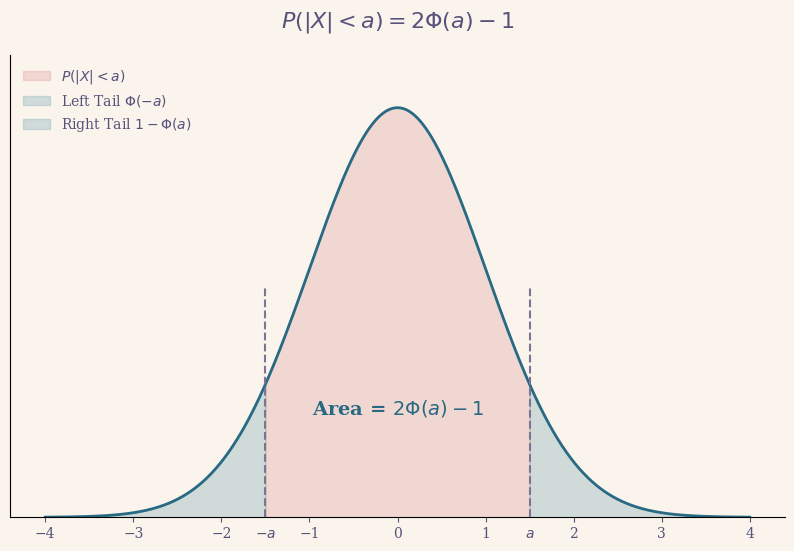

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# --- Rose Pine Dawn 配色 ---
theme = {
    'base': '#faf4ed', 'text': '#575279', 'pine': '#286983',
    'rose': '#d7827e', 'foam': '#56949f', 'subtle': '#797593',
    'highlight': '#dfdad9'
}

plt.rcParams.update({
    'figure.facecolor': theme['base'], 'axes.facecolor': theme['base'],
    'text.color': theme['text'], 'axes.labelcolor': theme['text'],
    'xtick.color': theme['text'], 'ytick.color': theme['text'],'font.family': 'serif',
    'axes.spines.top': False, 'axes.spines.right': False
})

# 数据
x = np.linspace(-4, 4, 1000)
y = norm.pdf(x)
a = 1.5 # 设定边界 a

fig, ax = plt.subplots(figsize=(10, 6))

# 1. 绘制主曲线
ax.plot(x, y, color=theme['pine'], lw=2)

# 2. 填充中间区域 P(|X| < a) -> Rose (粉色)
x_mid = np.linspace(-a, a, 1000)
ax.fill_between(x_mid, norm.pdf(x_mid), color=theme['rose'], alpha=0.25, label=r'$P(|X|<a)$')

# 3. 填充左尾巴 Phi(-a) -> Foam (青色)
x_left = np.linspace(-4, -a, 1000)
ax.fill_between(x_left, norm.pdf(x_left), color=theme['foam'], alpha=0.25, label=r'Left Tail $\Phi(-a)$')

# 4. 填充右尾巴 1 - Phi(a) -> Foam (青色)
x_right = np.linspace(a, 4, 1000)
ax.fill_between(x_right, norm.pdf(x_right), color=theme['foam'], alpha=0.25, label=r'Right Tail $1-\Phi(a)$')

# 标注关键点
ax.axvline(a, color=theme['subtle'], linestyle='--', ymax=0.5)
ax.axvline(-a, color=theme['subtle'], linestyle='--', ymax=0.5)
ax.text(a, -0.02, '$a$', ha='center', color=theme['text'])
ax.text(-a, -0.02, '$-a$', ha='center', color=theme['text'])

# 添加解释性标注
#ax.annotate(r'Total Area = 1', xy=(0, 0.2), xytext=(2.5, 0.3),
 #           arrowprops=dict(arrowstyle="->", color=theme['text']), fontsize=12)

ax.text(0, 0.1, r'Area = $2\Phi(a) - 1$', ha='center', fontsize=14, color=theme['pine'], fontweight='bold')

# 设置标题和公式
ax.set_title(r'$P(|X|<a) = 2\Phi(a) - 1$', fontsize=16, pad=20)
ax.set_ylim(0, 0.45)
ax.legend(loc='upper left', frameon=False)
ax.set_yticks([]) # 隐藏 Y 轴刻度，只看形状

plt.show()